In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Assuming your dataset is in a CSV file
df = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/project 2024/sentiment analysis/Dataset in CSV/Dataset in CSV/Laptop/train.csv')


In [ ]:
# Display the first few rows
print(df.head())

# Get summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

                                               Token  \
0  ['I', 'charge', 'it', 'at', 'night', 'and', 's...   
1  ['I', 'charge', 'it', 'at', 'night', 'and', 's...   
2  ['The', 'tech', 'guy', 'then', 'said', 'the', ...   
3  ['The', 'tech', 'guy', 'then', 'said', 'the', ...   
4  ['The', 'tech', 'guy', 'then', 'said', 'the', ...   

                            Term  Polarity  From  To  
0                       ['cord']   neutral     9  10  
1            ['battery', 'life']  positive    16  18  
2          ['service', 'center']  negative     6   8  
3  ['``', 'sales', "''", 'team']  negative    22  26  
4                ['tech', 'guy']   neutral     1   3  
              From           To
count  2282.000000  2282.000000
mean     10.344873    11.905784
std       9.199327     9.239963
min       0.000000     1.000000
25%       4.000000     5.000000
50%       8.000000    10.000000
75%      14.000000    16.000000
max      67.000000    68.000000
Token       0
Term        0
Polarity    0
Fro

In [ ]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Fill missing values with mean, median, or a specific value
# df_filled = df.fillna(df.mean())


#** Data cleaning**



In [ ]:

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from torchtext.vocab import GloVe

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Sentiment analysis/project 2024/sentiment analysis/Dataset in CSV/Dataset in CSV/Laptop/train.csv")

print(df.head())


                                               Token  \
0  ['I', 'charge', 'it', 'at', 'night', 'and', 's...   
1  ['I', 'charge', 'it', 'at', 'night', 'and', 's...   
2  ['The', 'tech', 'guy', 'then', 'said', 'the', ...   
3  ['The', 'tech', 'guy', 'then', 'said', 'the', ...   
4  ['The', 'tech', 'guy', 'then', 'said', 'the', ...   

                            Term  Polarity  From  To  
0                       ['cord']   neutral     9  10  
1            ['battery', 'life']  positive    16  18  
2          ['service', 'center']  negative     6   8  
3  ['``', 'sales', "''", 'team']  negative    22  26  
4                ['tech', 'guy']   neutral     1   3  


In [ ]:
df.columns

Index(['Token', 'Term', 'Polarity', 'From', 'To'], dtype='object')

In [ ]:
# prompt: drop the column to and from

df.drop(['To', 'From','Term'], axis=1, inplace=True)

In [ ]:
df.head()

,Token,Polarity
0,"['I', 'charge', 'it', 'at', 'night', 'and', 's...",neutral
1,"['I', 'charge', 'it', 'at', 'night', 'and', 's...",positive
2,"['The', 'tech', 'guy', 'then', 'said', 'the', ...",negative
3,"['The', 'tech', 'guy', 'then', 'said', 'the', ...",negative
4,"['The', 'tech', 'guy', 'then', 'said', 'the', ...",neutral


In [ ]:
# prompt: print all the values of Token column and Polarity column

for i, row in df.iterrows():
  print(f"Token: {row['Token']}, Polarity: {row['Polarity']}")


Token: ['I', 'charge', 'it', 'at', 'night', 'and', 'skip', 'taking', 'the', 'cord', 'with', 'me', 'because', 'of', 'the', 'good', 'battery', 'life', '.'], Polarity: neutral
Token: ['I', 'charge', 'it', 'at', 'night', 'and', 'skip', 'taking', 'the', 'cord', 'with', 'me', 'because', 'of', 'the', 'good', 'battery', 'life', '.'], Polarity: positive
Token: ['The', 'tech', 'guy', 'then', 'said', 'the', 'service', 'center', 'does', 'not', 'do', '1-to-1', 'exchange', 'and', 'I', 'have', 'to', 'direct', 'my', 'concern', 'to', 'the', '``', 'sales', "''", 'team', ',', 'which', 'is', 'the', 'retail', 'shop', 'which', 'I', 'bought', 'my', 'netbook', 'from', '.'], Polarity: negative
Token: ['The', 'tech', 'guy', 'then', 'said', 'the', 'service', 'center', 'does', 'not', 'do', '1-to-1', 'exchange', 'and', 'I', 'have', 'to', 'direct', 'my', 'concern', 'to', 'the', '``', 'sales', "''", 'team', ',', 'which', 'is', 'the', 'retail', 'shop', 'which', 'I', 'bought', 'my', 'netbook', 'from', '.'], Polarity: 

In [ ]:
# prompt: # prompt: if there are duplicate tokens and if both have same polarity  then keep the same but if polarities are positive and neutral then set polarity positive to duplicate tokens and if polarities are negative and neutral then set negative to duplicates tokens and if polarities are negative and positive then delete the rows

df_nodup = df.drop_duplicates(subset='Token', keep='first')
df_nodup = df_nodup.reset_index(drop=True)

new_df = pd.DataFrame(columns=['Token', 'Polarity'])

for i, row in df_nodup.iterrows():
  token = row['Token']
  polarity = row['Polarity']
  existing_rows = df[df['Token'] == token]
  if len(existing_rows) > 1:
    polarities = existing_rows['Polarity'].tolist()
    if 'positive' in polarities and 'neutral' in polarities:
      new_df = new_df.append({'Token': token, 'Polarity': 'positive'}, ignore_index=True)
    elif 'negative' in polarities and 'neutral' in polarities:
      new_df = new_df.append({'Token': token, 'Polarity': 'negative'}, ignore_index=True)
    elif 'negative' in polarities and 'positive' in polarities:
      continue
    else:
      new_df = new_df.append(row, ignore_index=True)
  else:
    new_df = new_df.append(row, ignore_index=True)

df = new_df.copy()


Token: ['It', 'is', 'also', 'very', 'lightweight', ',', 'making', 'transporting', 'this', 'computer', 'very', 'easy', '.'], Polarity: positive
Token: ['It', "'s", 'wonderful', 'for', 'computer', 'gaming', '.'], Polarity: positive
Token: ['You', 'have', 'to', 'toss', 'out', 'the', 'wifi', 'card', 'and', 'replace', 'it', 'just', 'to', 'have', 'any', 'sort', 'of', 'network', 'capability', '.'], Polarity: negative
Token: ['You', 'have', 'to', 'toss', 'out', 'the', 'wifi', 'card', 'and', 'replace', 'it', 'just', 'to', 'have', 'any', 'sort', 'of', 'network', 'capability', '.'], Polarity: negative
Token: ['AND', 'the', 'best', 'part', 'is', 'that', 'it', 'even', 'comes', 'with', 'a', 'free', 'printer', '(', 'when', 'they', 'have', 'a', 'certain', 'promotion/offer', 'going', ',', 'of', 'course', ')', '!'], Polarity: positive
Token: ['it', 'is', 'very', 'easy', 'for', 'anyone', 'to', 'use', 'an', 'apple', 'and', 'specially', 'the', 'mcbook', 'pro', 'notebook', '.'], Polarity: positive
Token: ['

<ipython-input-13-040960714232>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'Token': token, 'Polarity': 'positive'}, ignore_index=True)
<ipython-input-13-040960714232>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'Token': token, 'Polarity': 'negative'}, ignore_index=True)
<ipython-input-13-040960714232>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row, ignore_index=True)
<ipython-input-13-040960714232>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row, ignore_index=True)
<ipython-input-13-040960714232>:17: FutureWarning: The

In [ ]:
#setting sentiment
df['sentiment'] = df['Polarity'].apply(lambda x: 1 if x == 'positive' else 0 if x == 'neutral' else -1)

In [ ]:
df.head(10)

,Token,Polarity,sentiment
0,"['I', 'charge', 'it', 'at', 'night', 'and', 's...",positive,1
1,"['The', 'tech', 'guy', 'then', 'said', 'the', ...",negative,-1
2,"['it', 'is', 'of', 'high', 'quality', ',', 'ha...",positive,1
3,"['Easy', 'to', 'start', 'up', 'and', 'does', '...",positive,1
4,"['I', 'even', 'got', 'my', 'teenage', 'son', '...",positive,1
5,"['Great', 'laptop', 'that', 'offers', 'many', ...",positive,1
6,"['One', 'night', 'I', 'turned', 'the', 'freaki...",negative,-1
7,"['I', 'took', 'it', 'back', 'for', 'an', 'Asus...",neutral,0
8,"['However', ',', 'the', 'multi-touch', 'gestur...",positive,1
9,"['I', 'love', 'the', 'way', 'the', 'entire', '...",positive,1


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

In [ ]:
# Validate the data
print(df.isnull().sum())  # Check for missing values
print(df.describe())  # Get descriptive statistics


Token        0
Polarity     0
sentiment    0
dtype: int64
         sentiment
count  1403.000000
mean      0.007840
std       0.930891
min      -1.000000
25%      -1.000000
50%       0.000000
75%       1.000000
max       1.000000


In [ ]:
#count the numbers of positive , negative and neutral

df['Polarity'].value_counts()


positive    613
negative    602
neutral     188
Name: Polarity, dtype: int64

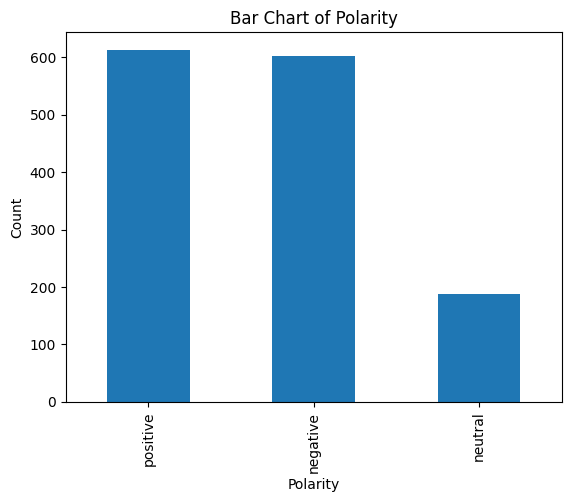

In [ ]:
# code to plot bar chart of df on the basis of their polarity

import matplotlib.pyplot as plt
df['Polarity'].value_counts().plot(kind='bar')
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.title("Bar Chart of Polarity")
plt.show()

In [ ]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

In [ ]:
# Further analysis based on the data type

# Analyze categorical columns
for col in categorical_cols:
    print(df[col].value_counts())

['I', 'charge', 'it', 'at', 'night', 'and', 'skip', 'taking', 'the', 'cord', 'with', 'me', 'because', 'of', 'the', 'good', 'battery', 'life', '.']                                            1
['The', 'keyboard', ',', 'which', 'generally', 'felt', 'okay', 'even', 'for', 'someone', 'used', 'to', 'a', 'desktop', 'keyboard', ',', 'now', 'looks', 'terrible', '.']                      1
['It', "'s", 'also', 'fairly', 'easy', 'to', 'use', 'the', 'Operating', 'System', '.']                                                                                                        1
['I', 'called', 'their', 'repair', 'depot', 'as', 'was', 'told', 'they', 'would', 'send', 'Me', 'a', 'new', 'box', 'to', 'return', 'the', 'computer', 'to', 'the', 'repair', 'depot', '.']    1
['Every', 'driver', 'on', 'the', 'drivers/applications', 'DVD', 'is', 'everything', 'you', 'will', 'need', 'for', 'a', 'reload', '.']                                                         1
                                        

In [ ]:
import re
def remove_tags(text):
  clean=re.compile('<.*?>')
  new_text=re.sub(clean," ",text)
  return new_text

In [ ]:
df['Token']=df['Token'].apply(remove_tags)


In [ ]:
df.head()

,Token,Polarity,sentiment
0,"['I', 'charge', 'it', 'at', 'night', 'and', 's...",positive,1
1,"['The', 'tech', 'guy', 'then', 'said', 'the', ...",negative,-1
2,"['it', 'is', 'of', 'high', 'quality', ',', 'ha...",positive,1
3,"['Easy', 'to', 'start', 'up', 'and', 'does', '...",positive,1
4,"['I', 'even', 'got', 'my', 'teenage', 'son', '...",positive,1


#**Removing special characters from the dataset**

In [ ]:
def remove_special(text):
  new_text=""
  for i in text:
    if i.isalpha() or i==" ":
      new_text+=i
    else:
      new_text+=" "
  return new_text

In [ ]:
df['Token']=df['Token'].apply(remove_special)


In [ ]:
df.head()

,Token,Polarity,sentiment
0,I charge it at night and s...,positive,1
1,The tech guy then said the ...,negative,-1
2,it is of high quality ha...,positive,1
3,Easy to start up and does ...,positive,1
4,I even got my teenage son ...,positive,1


In [ ]:
df.to_csv('laptop_train.csv')

In [ ]:
# prompt: download data in csv

from google.colab import files
df.to_csv('laptop_train.csv', index=False)
files.download('laptop_train.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **visualization**

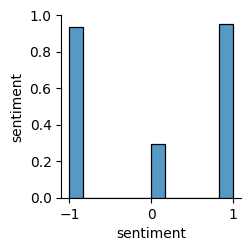

In [ ]:
# Visualize the relationships between features
import seaborn as sns

sns.pairplot(df)
plt.show()


<ipython-input-32-7e1d39359688>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


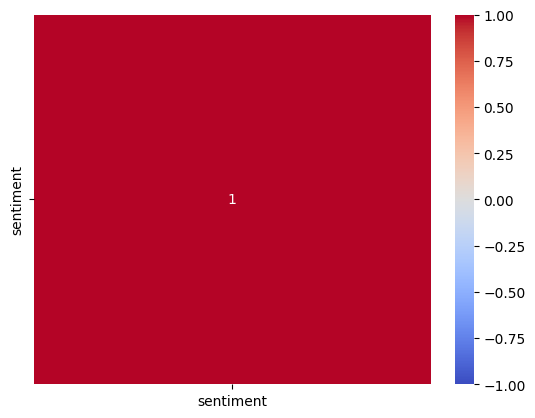

In [ ]:
# prompt: heatmap for the above dataset

import seaborn as sns

# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

# Show the heatmap
plt.show()
#The heatmap is showing the correlation between different features in the dataset. The values in the heatmap range from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation. The colors in the heatmap represent the strength of the correlation, with red indicating a strong positive correlation, blue indicating a strong negative correlation, and white indicating no correlation.


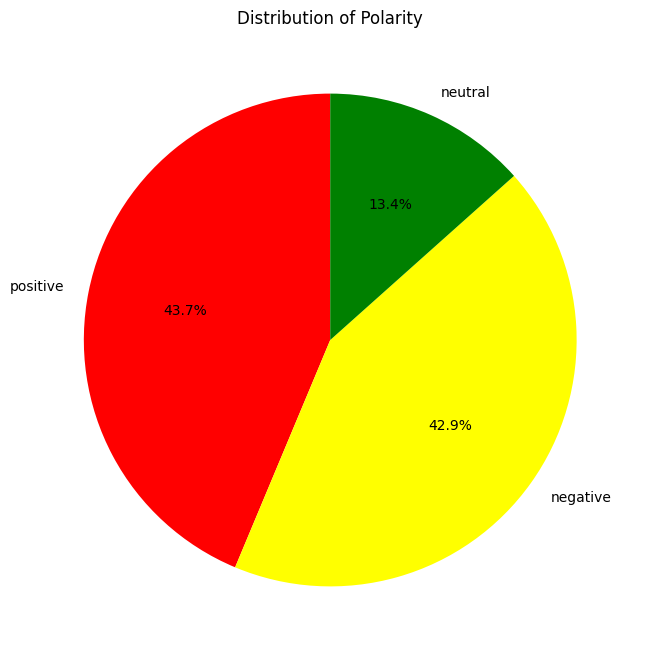

In [ ]:
# Count the occurrences of each polarity
polarity_counts = df['Polarity'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'yellow', 'green'])
plt.title('Distribution of Polarity')
plt.show()

# **data cleaning of testing data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#loading data
df_test=pd.read_csv('/content/drive/MyDrive/Sentiment analysis/project 2024/sentiment analysis/Dataset in CSV/Dataset in CSV/Laptop/test.csv')

In [ ]:
#Display the firdt few rows
print(df_test.head())

#get summary statistics
print(df_test.describe())

#check for missing values
print(df_test.isnull().sum())

                                               Token  \
0  ['Boot', 'time', 'is', 'super', 'fast', ',', '...   
1  ['tech', 'support', 'would', 'not', 'fix', 'th...   
2                  ['Set', 'up', 'was', 'easy', '.']   
3  ['Did', 'not', 'enjoy', 'the', 'new', 'Windows...   
4  ['Did', 'not', 'enjoy', 'the', 'new', 'Windows...   

                           Term  Polarity  From  To  
0              ['Boot', 'time']  positive     0   2  
1           ['tech', 'support']  negative     0   2  
2                 ['Set', 'up']  positive     0   2  
3              ['Windows', '8']  negative     5   7  
4  ['touchscreen', 'functions']  negative     8  10  
             From          To
count  632.000000  632.000000
mean     8.561709   10.280063
std      8.302100    8.485041
min      0.000000    1.000000
25%      3.000000    5.000000
50%      7.000000    8.000000
75%     12.000000   14.000000
max     71.000000   72.000000
Token       0
Term        0
Polarity    0
From        0
To          0

**Data cleaning of test data**

In [ ]:
import pandas as pd
df_test=pd.read_csv('/content/drive/MyDrive/Sentiment analysis/project 2024/sentiment analysis/Dataset in CSV/Dataset in CSV/Laptop/test.csv')

print(df_test.head())

                                               Token  \
0  ['Boot', 'time', 'is', 'super', 'fast', ',', '...   
1  ['tech', 'support', 'would', 'not', 'fix', 'th...   
2                  ['Set', 'up', 'was', 'easy', '.']   
3  ['Did', 'not', 'enjoy', 'the', 'new', 'Windows...   
4  ['Did', 'not', 'enjoy', 'the', 'new', 'Windows...   

                           Term  Polarity  From  To  
0              ['Boot', 'time']  positive     0   2  
1           ['tech', 'support']  negative     0   2  
2                 ['Set', 'up']  positive     0   2  
3              ['Windows', '8']  negative     5   7  
4  ['touchscreen', 'functions']  negative     8  10  


In [ ]:
df_test.head(50)

,Token,Term,Polarity,From,To
0,"['Boot', 'time', 'is', 'super', 'fast', ',', '...","['Boot', 'time']",positive,0,2
1,"['tech', 'support', 'would', 'not', 'fix', 'th...","['tech', 'support']",negative,0,2
2,"['Set', 'up', 'was', 'easy', '.']","['Set', 'up']",positive,0,2
3,"['Did', 'not', 'enjoy', 'the', 'new', 'Windows...","['Windows', '8']",negative,5,7
4,"['Did', 'not', 'enjoy', 'the', 'new', 'Windows...","['touchscreen', 'functions']",negative,8,10
5,"['Other', 'than', 'not', 'being', 'a', 'fan', ...","['internal', 'speakers']",negative,18,20
6,"['Other', 'than', 'not', 'being', 'a', 'fan', ...","['price', 'tag']",positive,42,44
7,"['Other', 'than', 'not', 'being', 'a', 'fan', ...","['click', 'pads']",negative,7,9
8,"['No', 'installation', 'disk', '(', 'DVD', ')'...","['installation', 'disk', '(', 'DVD']",neutral,1,5
9,"['It', ""'s"", 'fast', ',', 'light', ',', 'and',...",['use'],positive,9,10


In [ ]:
df_test.columns

Index(['Token', 'Term', 'Polarity', 'From', 'To'], dtype='object')

In [ ]:
#Drop the column TO and From and Term

df_test.drop(['To','From','Term'], axis=1, inplace=True)
df_test.head()

,Token,Polarity
0,"['Boot', 'time', 'is', 'super', 'fast', ',', '...",positive
1,"['tech', 'support', 'would', 'not', 'fix', 'th...",negative
2,"['Set', 'up', 'was', 'easy', '.']",positive
3,"['Did', 'not', 'enjoy', 'the', 'new', 'Windows...",negative
4,"['Did', 'not', 'enjoy', 'the', 'new', 'Windows...",negative


In [ ]:
# prompt: # prompt: if there are duplicate tokens and if both have same polarity  then keep the same but if polarities are positive and neutral then set polarity positive to duplicate tokens and if polarities are negative and neutral then set negative to duplicates tokens and if polarities are negative and positive then delete the rows

df_nodup_test = df_test.drop_duplicates(subset='Token', keep='first')
df_nodup_test = df_nodup_test.reset_index(drop=True)

new_df_test = pd.DataFrame(columns=['Token', 'Polarity'])

for i, row in df_nodup_test.iterrows():
  token = row['Token']
  polarity = row['Polarity']
  existing_rows = df_test[df_test['Token'] == token]
  if len(existing_rows) > 1:
    polarities = existing_rows['Polarity'].tolist()
    if 'positive' in polarities and 'neutral' in polarities:
      new_df_test = new_df_test.append({'Token': token, 'Polarity': 'positive'}, ignore_index=True)
    elif 'negative' in polarities and 'neutral' in polarities:
      new_df_test = new_df_test.append({'Token': token, 'Polarity': 'negative'}, ignore_index=True)
    elif 'negative' in polarities and 'positive' in polarities:
      continue
    else:
      new_df_test = new_df_test.append(row, ignore_index=True)
  else:
    new_df_test = new_df_test.append(row, ignore_index=True)

df_test = new_df_test.copy()


<ipython-input-98-ef90c62111f8>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df_test = new_df_test.append(row, ignore_index=True)
<ipython-input-98-ef90c62111f8>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df_test = new_df_test.append(row, ignore_index=True)
<ipython-input-98-ef90c62111f8>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df_test = new_df_test.append({'Token': token, 'Polarity': 'positive'}, ignore_index=True)
<ipython-input-98-ef90c62111f8>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df_test = new_df_test.append(row, ignore_index=True)
<ipython-input-98-ef90c62111f8>:21: FutureWarning: 

In [ ]:
df_test.head()

,Token,Polarity
0,"['Boot', 'time', 'is', 'super', 'fast', ',', '...",positive
1,"['tech', 'support', 'would', 'not', 'fix', 'th...",negative
2,"['Set', 'up', 'was', 'easy', '.']",positive
3,"['Did', 'not', 'enjoy', 'the', 'new', 'Windows...",negative
4,"['No', 'installation', 'disk', '(', 'DVD', ')'...",neutral


In [ ]:
df_test['Polarity'].value_counts()

positive    224
negative     97
neutral      81
Name: Polarity, dtype: int64

In [ ]:
#setting sentiment
df_test['sentiment'] = df_test['Polarity'].apply(lambda x: 1 if x == 'positive' else 0 if x == 'neutral' else -1)

In [ ]:
df_test.head()

,Token,Polarity,sentiment
0,"['Boot', 'time', 'is', 'super', 'fast', ',', '...",positive,1
1,"['tech', 'support', 'would', 'not', 'fix', 'th...",negative,-1
2,"['Set', 'up', 'was', 'easy', '.']",positive,1
3,"['Did', 'not', 'enjoy', 'the', 'new', 'Windows...",negative,-1
4,"['No', 'installation', 'disk', '(', 'DVD', ')'...",neutral,0


In [ ]:
#check missing values

#missing_values_test = df_test.isnull().sum()

In [ ]:
#df_test=df_test.fillna(df_test.median())

<ipython-input-67-11bc341297f8>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test=df_test.fillna(df_test.median())


In [ ]:
#validate the data

print(df_test.isnull().sum())
print(df_test.describe())

Token        0
Polarity     0
sentiment    0
dtype: int64
        sentiment
count  402.000000
mean     0.315920
std      0.836925
min     -1.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      1.000000


In [ ]:
#count the numbers of poesitive , negative and neutral

df_test['Polarity'].value_counts()

positive    224
negative     97
neutral      81
Name: Polarity, dtype: int64

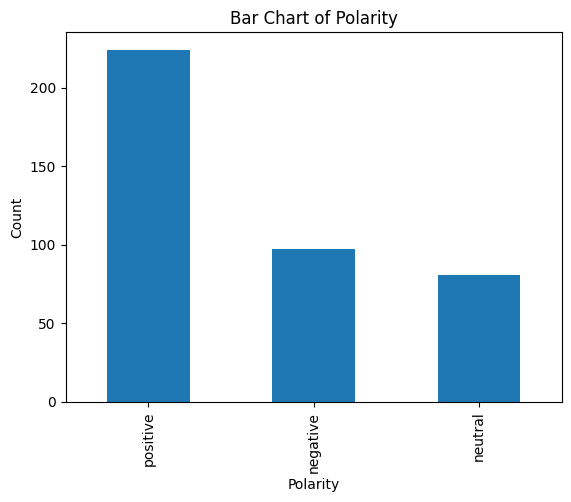

In [ ]:
# code to plot bar chart of df on the basis of their polarity

import matplotlib.pyplot as plt
df_test['Polarity'].value_counts().plot(kind='bar')
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.title("Bar Chart of Polarity")
plt.show()

In [ ]:
# Identify categorical and numerical columns
categorical_col = df_test.select_dtypes(include=["object"]).columns
numerical_col = df_test.select_dtypes(include=["int64", "float64"]).columns

In [ ]:
# Further analysis based on the data type

# Analyze categorical columns
for col in categorical_col:
    print(df_test[col].value_counts())

['Boot', 'time', 'is', 'super', 'fast', ',', 'around', 'anywhere', 'from', '35', 'seconds', 'to', '1', 'minute', '.']                                                                                                                                                                                                                                                 1
['Not', 'too', 'expense', 'and', 'has', 'enough', 'storage', 'for', 'most', 'users', 'and', 'many', 'ports', '.']                                                                                                                                                                                                                                                     1
['I', 'like', 'the', 'Mini', 'Mac', 'it', 'was', 'easy', 'to', 'setup', 'and', 'install', ',', 'but', 'I', 'am', 'learning', 'as', 'I', 'go', 'and', 'could', 'use', 'a', 'tutorial', 'to', 'learn', 'how', 'to', 'use', 'some', 'of', 'the', 'features', 'I', 'was', 'use', 'to', 'on',

In [ ]:
import re
def remove_tags(text):
  clean=re.compile('<.*?>')
  new_text=re.sub(clean," ",text)
  return new_text

In [ ]:
df_test['Token']=df_test['Token'].apply(remove_tags)


In [ ]:
df_test.head()

,Token,Polarity,sentiment
0,"['Boot', 'time', 'is', 'super', 'fast', ',', '...",positive,1
1,"['tech', 'support', 'would', 'not', 'fix', 'th...",negative,-1
2,"['Set', 'up', 'was', 'easy', '.']",positive,1
3,"['Did', 'not', 'enjoy', 'the', 'new', 'Windows...",negative,-1
4,"['No', 'installation', 'disk', '(', 'DVD', ')'...",neutral,0


In [ ]:
def remove_special(text):
  new_text=""
  for i in text:
    if i.isalpha() or i==" ":
      new_text+=i
    else:
      new_text+=" "
  return new_text

In [ ]:
df_test['Token']=df_test['Token'].apply(remove_special)


In [ ]:
df_test.head()

,Token,Polarity,sentiment
0,Boot time is super fast ...,positive,1
1,tech support would not fix th...,negative,-1
2,Set up was easy,positive,1
3,Did not enjoy the new Windows...,negative,-1
4,No installation disk DVD ...,neutral,0


In [ ]:
df_test.to_csv('laptop_test.csv')

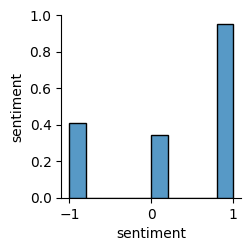

In [ ]:
# Visualize the relationships between features
import seaborn as sns

sns.pairplot(df_test)
plt.show()

<ipython-input-116-323a47ab5573>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_test.corr()


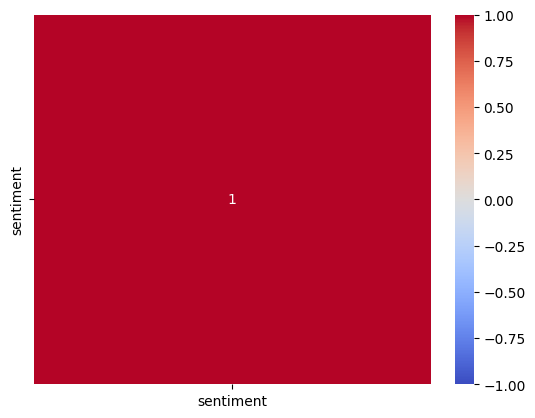

In [ ]:
# prompt: heatmap for the above dataset

import seaborn as sns

# Calculate the correlation matrix
corr = df_test.corr()

# Create a heatmap
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

# Show the heatmap
plt.show()
#The heatmap is showing the correlation between different features in the dataset. The values in the heatmap range from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation. The colors in the heatmap represent the strength of the correlation, with red indicating a strong positive correlation, blue indicating a strong negative correlation, and white indicating no correlation.


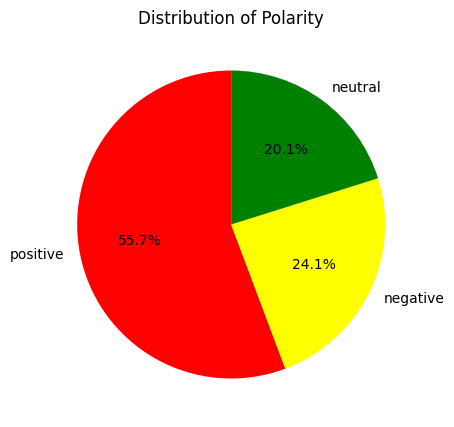

In [ ]:
# Count the occurrences of each polarity
polarity_counts = df_test['Polarity'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'yellow', 'green'])
plt.title('Distribution of Polarity')
plt.show()